# План работы

1. Изучение даных
2. Подготовка данных
3. Исследовательский анализ
4. Сравнение регионов NA/EU/JP
5. Гипотезы
6. Выводы

## Изучение данных из файлов

<div style="border:solid blue 2px; padding: 20px">

Импортируем библиотеки
</div>

In [1]:
# импорт библиотек
import pandas as pd
import copy
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')

<div style="border:solid blue 2px; padding: 20px">
    
Методом `read_csv()` прочитаем `users.csv` и сохраним в переменную `data_users`:
    
</div>

In [2]:
# чтение файла с данными и сохранение в data_users
# метод try-except поможет загрузить данные локально или глобально
try:
    df = pd.read_csv('C:/Users/games.csv')  # Локальный путь
except:
    df = pd.read_csv('/datasets/games.csv')  # Серверный путь

In [3]:
# получение случайных 5 строк таблицы
df.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2422,Guitar Hero: Warriors of Rock,X360,2010.0,Misc,0.47,0.31,0.00,0.08,72.0,6.5,T
10189,Karaoke Revolution Presents American Idol Encore,X360,2008.0,Misc,0.10,0.00,0.00,0.01,70.0,7,E
16014,Robopon 2: Ring Version,GBA,2001.0,Role-Playing,0.01,0.00,0.00,0.00,68.0,tbd,E
4125,World of Outlaws: Sprint Cars 2002,PS2,2002.0,Racing,0.23,0.18,0.00,0.06,80.0,9.1,E
987,Dead or Alive 3,XB,2001.0,Fighting,1.19,0.29,0.24,0.06,87.0,8.6,T


<div style="border:solid blue 2px; padding: 20px">
    
`head()` выводим на экран первые пять строк таблицы:
    </div>

In [4]:
# получение первых 5 строк таблицы
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div style="border:solid blue 2px; padding: 20px">
    
`info()` получим общую информацию о таблице:
    </div>

In [5]:
# получение общей информации о данных в таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div style="border:solid blue 2px; padding: 20px">
    
 
Методом `describe()` получим описание данных
    
    
</div> 

In [6]:
# описание данных
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<div style="border:solid blue 2px; padding: 20px">

    
Создадим функцию с именем `show(df)` c параметром `df`,
    
в теле функции циклом проходим по всем колонкам.    
    
Методом `unique()` получаем уеикальные значения всех колонок и  
    
`value_counts()` смотрим на количество каждого признака .
        
    
</div> 

In [7]:
# функция для вывода информации по признакам
def show(df):
    for column in df.columns:
        print('Список уникальных', column)
        print()
        print(df[column].unique())
        print()
        print(df[column].value_counts())
        print()
        display(df[df[column].isna()])
        print()

In [8]:
# вывод данных
show(df)

Список уникальных Name

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']

Need for Speed: Most Wanted                         12
LEGO Marvel Super Heroes                             9
Madden NFL 07                                        9
FIFA 14                                              9
Ratatouille                                          9
                                                    ..
Fatal Frame II: Crimson Butterfly Director's Cut     1
DJ Star                                              1
Uncharted: The Nathan Drake Collection               1
Rocket: Robot on Wheels                              1
Star Wars: Empire at War                             1
Name: Name, Length: 11559, dtype: int64



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN



Список уникальных Platform

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating



Список уникальных Year_of_Release

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN



Список уникальных Genre

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN



Список уникальных NA_sales

[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+01 9.540e+00 9.660e+00 8.410e+00 6.060e+00 3.430e+00 5.510e+00
 6.850e+00 9.040e+00 5.890e+00 6.030e+00 9.700e+00 5.280e+00 4.990e+00
 8.250e+00 8.520e+00 5.540e+00 6.990e+00 6.620e+00 5.030e+00 5.990e+00
 3.960e+00 2.500e+00 7.970e+00 6.910e+00 4.340e+00 4.350e+00 3.010e+00
 6.160e+00 6.760e+00 4.020e+00 4.890e+00 2.960e+00 4.760e+00 5.010e+00
 6.730e+00 5.950e+00 3.660e+00 5.550e+00 7.040e+00 6.650e+00 3.880e+00
 5.800e+00 4.100e+00 5.930e+00 4.360e+00 5.700e+00 2.030e+00 4.400e+00
 5.050e+00 3.540e+00 1.120e+00 6.820e+00 1.750e+00 3.740e+00 1.060e+00
 2.790e+00 2.910e+00 9.900e-01 2.570e+00 2.990e+00 2.280e+00 7.280e+00
 2.760e+00 2.900e+00 2.810e+00 6.600e-01 3.780e+00 3.270e+00 3.560e+00
 5.390e+00 4.590e+00 4.810e+00 4.460e+00 3.480e+

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating



Список уникальных EU_sales

[2.896e+01 3.580e+00 1.276e+01 1.093e+01 8.890e+00 2.260e+00 9.140e+00
 9.180e+00 6.940e+00 6.300e-01 1.095e+01 7.470e+00 6.180e+00 8.030e+00
 4.890e+00 8.490e+00 9.090e+00 4.000e-01 3.750e+00 9.200e+00 4.460e+00
 2.710e+00 3.440e+00 5.140e+00 5.490e+00 3.900e+00 5.350e+00 3.170e+00
 5.090e+00 4.240e+00 5.040e+00 5.860e+00 3.680e+00 4.190e+00 5.730e+00
 3.590e+00 4.510e+00 2.550e+00 4.020e+00 4.370e+00 6.310e+00 3.450e+00
 2.810e+00 2.850e+00 3.490e+00 1.000e-02 3.350e+00 2.040e+00 3.070e+00
 3.870e+00 3.000e+00 4.820e+00 3.640e+00 2.150e+00 3.690e+00 2.650e+00
 2.560e+00 3.110e+00 3.140e+00 1.940e+00 1.950e+00 2.470e+00 2.280e+00
 3.420e+00 3.630e+00 2.360e+00 1.710e+00 1.850e+00 2.790e+00 1.240e+00
 6.120e+00 1.530e+00 3.470e+00 2.240e+00 5.010e+00 2.010e+00 1.720e+00
 2.070e+00 6.420e+00 3.860e+00 4.500e-01 3.480e+00 1.890e+00 5.750e+00
 2.170e+00 1.370e+00 2.350e+00 1.180e+00 2.110e+00 1.880e+00 2.830e+00
 2.990e+00 2.890e+00 3.270e+00 2.220e+00 2.140e+

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating



Список уникальных JP_sales

[3.770e+00 6.810e+00 3.790e+00 3.280e+00 1.022e+01 4.220e+00 6.500e+00
 2.930e+00 4.700e+00 2.800e-01 1.930e+00 4.130e+00 7.200e+00 3.600e+00
 2.400e-01 2.530e+00 9.800e-01 4.100e-01 3.540e+00 4.160e+00 6.040e+00
 4.180e+00 3.840e+00 6.000e-02 4.700e-01 5.380e+00 5.320e+00 5.650e+00
 1.870e+00 1.300e-01 3.120e+00 3.600e-01 1.100e-01 4.350e+00 6.500e-01
 7.000e-02 8.000e-02 4.900e-01 3.000e-01 2.660e+00 2.690e+00 4.800e-01
 3.800e-01 5.330e+00 1.910e+00 3.960e+00 3.100e+00 1.100e+00 1.200e+00
 1.400e-01 2.540e+00 2.140e+00 8.100e-01 2.120e+00 4.400e-01 3.150e+00
 1.250e+00 4.000e-02 0.000e+00 2.470e+00 2.230e+00 1.690e+00 1.000e-02
 3.000e+00 2.000e-02 4.390e+00 1.980e+00 1.000e-01 3.810e+00 5.000e-02
 2.490e+00 1.580e+00 3.140e+00 2.730e+00 6.600e-01 2.200e-01 3.630e+00
 1.450e+00 1.310e+00 2.430e+00 7.000e-01 3.500e-01 1.400e+00 6.000e-01
 2.260e+00 1.420e+00 1.280e+00 1.390e+00 8.700e-01 1.700e-01 9.400e-01
 1.900e-01 2.100e-01 1.600e+00 1.600e-01 1.030e+

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating



Список уникальных Other_sales

[8.450e+00 7.700e-01 3.290e+00 2.950e+00 1.000e+00 5.800e-01 2.880e+00
 2.840e+00 2.240e+00 4.700e-01 2.740e+00 1.900e+00 7.100e-01 2.150e+00
 1.690e+00 1.770e+00 3.960e+00 1.057e+01 5.500e-01 2.040e+00 1.360e+00
 4.200e-01 4.600e-01 1.410e+00 1.780e+00 5.000e-01 1.180e+00 8.000e-01
 1.160e+00 1.320e+00 5.900e-01 2.380e+00 1.130e+00 7.800e-01 2.420e+00
 1.120e+00 1.280e+00 1.570e+00 1.300e+00 1.010e+00 9.100e-01 1.790e+00
 1.970e+00 8.600e-01 1.210e+00 2.300e-01 7.600e-01 7.400e-01 7.530e+00
 2.900e-01 1.030e+00 5.200e-01 2.110e+00 1.600e+00 1.610e+00 3.500e-01
 9.700e-01 1.060e+00 6.300e-01 1.500e-01 7.900e-01 9.600e-01 1.250e+00
 9.000e-01 8.100e-01 3.900e-01 6.800e-01 8.500e-01 1.800e-01 8.000e-02
 6.700e-01 7.000e-01 4.100e-01 3.300e-01 6.000e-01 5.400e-01 1.730e+00
 1.230e+00 1.600e-01 1.110e+00 3.100e-01 4.800e-01 6.200e-01 1.900e-01
 6.900e-01 1.020e+00 7.300e-01 1.080e+00 4.500e-01 2.800e-01 5.100e-01
 2.200e-01 1.090e+00 9.900e-01 3.000e-01 6.40

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating



Список уникальных Critic_Score

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: Critic_Score, Length: 82, dtype: int64



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN



Список уникальных User_Score

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.7       2
2.3       2
1.1       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN



Список уникальных Rating

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div style="border:solid blue 2px; padding: 20px">
    
Посчитаем сколько строк являются дубликатами.
    
    
</div>

<div style="border:solid blue 2px; padding: 20px">
    
Методом `duplicated()` проверим данные на наличие дубликатов и посчитаем их `sum()`
    
</div>

In [9]:
# подсчет явных дубликатов
print('Всего строк дубликатов: ', df.duplicated().sum())

Всего строк дубликатов:  0


### Вывод

<div style="border:solid blue 2px; padding: 20px">
    
    
**Оценка полученных данных**

Наблюдения, представленные в таблице описываются категориальными и количественными значениями.
    
Данные можно исследовать для дальнейшего анализа:
    
    
`Name` — название игры
    
`Platform` — платформа
    
`Year_of_Release` — год выпуска
    
`Genre` — жанр игры
    
`NA_sales` — продажи в Северной Америке (миллионы проданных копий)
    
`EU_sales` — продажи в Европе (миллионы проданных копий)
    
`JP_sales` — продажи в Японии (миллионы проданных копий)
    
`Other_sales` — продажи в других странах (миллионы проданных копий)
    
`Critic_Score` — оценка критиков (максимум 100)
    
`User_Score` — оценка пользователей (максимум 10)
    
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 
    
Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    
Данные содержат проблемы (ошибки), которые могут привести написанный алгоритм работы к искаженным результатам.
    

**Проблемы и их возможные причины появления:**
    
    
    
Пропуски в **Категориальных** переменных. 
    
    
- Пропуски `Name` обнаружены `NaN`. Причина появления технологическая. Решим удалением.
    
    
- Пропуски `Genre` обнаружены `NaN`. Причина появления технологическая. Решим удалением.
    
    
- Пропуски `Rating` обнаружены `NaN`. Причина появления человеческий фактор. 
    
    
Решим заменой на `unknown`, потому что не можем быстро уточнить данные и заменить их вручную.
    
Тип значения признака `Rating` оставляем `object`, потому что они описывают возрастную категорию.
    
    
- Артефакт `Platform` обнаружен `DS` с несоответстием [даты начала выпуска платформы в 2004 году](https://ru.wikipedia.org/wiki/Nintendo_DS)
    
  для `Name` `Strongest Tokyo University Shogi DS` и годом `Year_of_Release` `1985`.  
    
  Причина появления человеческий фактор. Решим заменой на `NES`.  
    
    
Уникальные значения в **Количественных** переменных.  
    
    
- Пропуски `Year_of_Release` обнаружены `NaN`. Причина человеческий фактор. Решим удалением.
    
  Разработчик той или иной игры уже сообщил о том, что она готовится к выходу, 
    
  но пока еще не может назвать точную дату.
    
    
- Пропуски `Critic_score` обнаружены `NaN`. Причина появления человеческий фактор. 
    
Решим заменой на `0`, потому что пропуск говорит об отсутствии оценки 
    
и заменить характерным значением не получится.
    
    
- Пропуски `User_score` обнаружены `NaN`. Причина появления человеческий фактор. 
    
Решим заменой на `0`, потому что пропуск говорит об отсутствии оценки 
    
и заменить характерным значением не получится.
    
 
- Артефакт `User_score` обнаружен `tbd` `to be defined` значит `будет определено`. 
    
    
  Причина появления человеческий фактор. Решим заменой на `0`.
    
    
  `tbd` игроки часто не указывают оценку. Равноценно пропуску.
    
   
**ОТСУТСТВИЕ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ В ОСТАЛЬНЫХ ПРИЗНАКАХ ОБЛЕГЧАЕТ ПРЕДОБРАБОТКУ**
    
    
</div>    

## Подготовка данных

<div style="border:solid blue 2px; padding: 20px">
    
`str.lower()` приведём названия столбцов к нижнему регистру
    </div>

In [10]:
# названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div style="border:solid blue 2px; padding: 20px">
    

**Заменим типы данных в следующих признаках:**
    
`df['year_of_release']` `float64` на `int` - нужен именно год выпуска
    
`df['user_score']` `object` на `float64`
    
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Удалим пропуски, чтобы изменить тип данных
    
</div>

<div style="border:solid blue 2px; padding: 20px">
    
Удалим пропуски в столбце `name`
    
</div>

In [11]:
# удаление строк
df.drop([659, 14244], inplace=True)

<div style="border:solid blue 2px; padding: 20px">
    
Удалим пропуски в столбце `year_of_release`, чтобы изменить тип данных
    
</div>

In [12]:
# удаление пропусков
df = df.dropna(subset=['year_of_release'])

<div style="border:solid blue 2px; padding: 20px">
    
Заменим пропуски в `rating` на `unknown`
    
</div>

In [13]:
# замена пропусков
df['rating'] = df['rating'].fillna(value='unknown')

<div style="border:solid blue 2px; padding: 20px">
    
Заменим уникальные значения в `user_score`, чтобы изменить тип данных
    
</div>

In [14]:
# замена уникального значения для облегчения дальнейшей обработки
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan

In [15]:
# замена пропусков
df = df.fillna(0)

<div style="border:solid blue 2px; padding: 20px">
    
Заменим уникальные значения в `platform` в строке `15957` на `NES`
    
</div>

In [16]:
# замена уникального значения
df.loc[15957, 'platform'] = 'NES'

<div style="border:solid blue 2px; padding: 20px">
    
Методом `astype` заменим тип данных
    
</div>

In [17]:
# замена типа данных
df['year_of_release'] = df['year_of_release'].astype('int')

In [18]:
# замена типа данных
df['user_score'] = df['user_score'].astype('float')

In [19]:
# получение общей информации о данных в таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null float64
rating             16444 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 2.1+ MB


<div style="border:solid blue 2px; padding: 20px">
    
    
Добавим столбец с суммарными продажами во всех регионах `sum_sales`
   
    
</div> 

In [20]:
# добавление столбца с суумой всех продаж
df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df['sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: sales, Length: 16444, dtype: float64

<div style="border:solid blue 2px; padding: 20px">
    
    
Добавим столбец с категориями производителей платформ `platform_type`
   
    
</div> 

In [21]:
# обработка платформ по категориям
def manufactur(platform):
    playstation = ['PSV','PSP','PS','PS2','PS3','PS4']
    microsoft = ['XB','XOne','X360']
    nintendo = ['SNES','NES','N64','Wii','WiiU','DS','3DS','GB','GBA','GC']
    sega = ['SAT','GEN','DC','SCD']
    if platform in playstation:
        return 'playstation'
    if platform in microsoft:
        return 'microsoft'
    if platform in nintendo:
        return 'nintendo'
    if platform in sega:
        return 'sega'
    if platform == 'PC':
        return 'PC'
    if platform == '2600':
        return 'atari'
    return 'other'
df['platform_type'] = df['platform'].apply(manufactur)
df['platform_type'].value_counts()

playstation    6637
nintendo       6169
microsoft      2282
PC              957
sega            258
atari           116
other            25
Name: platform_type, dtype: int64

### Вывод

<div style="border:solid blue 2px; padding: 20px">
    
    
- Применили хороший стиль в названии столбцов `df.columns`
    
 
- Заменили тип данных в столбцах `year_of_release` и `user_score`
    
    
- Удалили строки с пропусками в столбцах `year_of_release` `name`
    
    
- Заменили в столбце `rating`  пропуски на `unknown`
    
    
- Заменили в столбцах `critic_score` и `user_score`  пропуски на `0`
   
    
- Добавили столбец `sales`
    
    
- Добавили столбец `platform_type` дальнейшего анализа
    
</div> 

## Исследовательский анализ данных

<div style="border:solid blue 2px; padding: 20px">
    
    
Методом `pivot_table()` получим сводную таблицу по `year_of_release`   
    
и посчитаем `name` количество игр `count()`
    
сохраним в переменную `name_per_year`
   
    
</div> 

In [22]:
# сводная таблица
name_per_year = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
name_per_year.sort_values(by='name', ascending=False)

,name
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


<div style="border:solid blue 2px; padding: 20px">
    
    
Методом `plot()` получим график по `year_of_release`   
    
и выделим данные не представляющие важности для анализа
   
    
</div> 

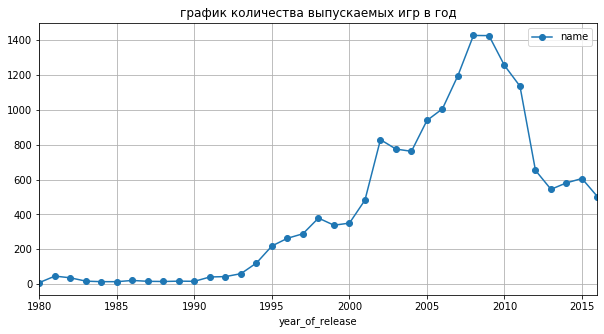

In [23]:
# график выпуска игр по годам
name_per_year.plot(style='o-' ,figsize=(10,5), grid=True, legend=True, title='график количества выпускаемых игр в год')

<div style="border:solid blue 2px; padding: 20px">
    
    
- До `1990` года количество игр не увеличивалось -   **За этот период данные не важны для анализа**
    
    
- С `1990` по `1998`года количество новых игр начало резко увеличиваться
    
    
`1993` Выпуск микропроцессора Pentium компании Intel и Microsoft выпуск ОС Windows NT.
    
`1994` Apple выпуск рабочей станции Power Macintosh на базе микропроцессора PowerPC
    
`1995` Появление DVD, Microsoft выпуск ОС Windows 95, Разработан язык программирования Java
 
    
- С `1998` по `2000`года произошло небольшое замедление в хронологии игр  
    
    
- С `2000` по `2002`года количество новых игр активно растёт
    
    
`2000` запуск PS2
    
`2001` Microsoft выпустила Xbox 
    
`2002` Резкое увеличение числа игр
    
    
- С `2002` по `2004`года произошло небольшое замедление в хронологии игр 
    
    
`2003` Компания 3DO объявила себя банкротом
    
    
- С `2004` по `2008`года количество новых игр активно растёт
       
    
- С `2009` по `2016`года количество игр идё на спад   
    
    
    
    
    
   
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
    
Методом `pivot_table()` получим сводную таблицу по `platform`   
    
и посчитаем `sum()` сумму `sales` продаж
    
сохраним в переменную `sales_per_platform`
    
и получим список `4-х` платформ с нибольшими суммарными продажами `top`
   
    
</div> 

In [24]:
# сводная таблица
sales_per_platform = df.pivot_table(index='platform', values='sales', aggfunc='sum')
sales_per_platform = sales_per_platform.sort_values(by='sales', ascending=False)
display(sales_per_platform)
top = list(sales_per_platform.index[:5])

,sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


<div style="border:solid blue 2px; padding: 20px">
    
    
Самые востребованные платформы по продажам 
    
    
    
- `PS2`

    
    
- `X360`
    
    
    
- `PS3`
    
    
    
- `Wii`
   
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
    
Методом `pivot_table()` получим сводную таблицу по `year_of_release` для `top`
    
и методом `plot()` построим график `top` по годам
    

    
</div> 

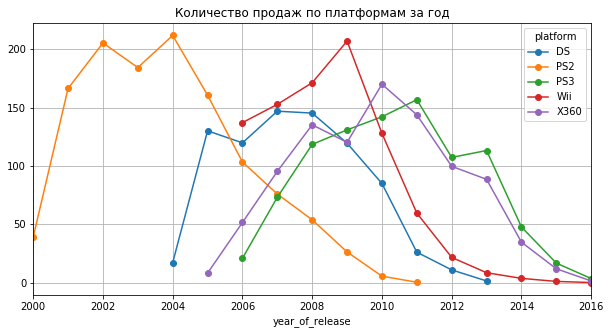

In [25]:
# сводная таблица
sales_top = df.query('platform in @top').pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum')
sales_top.plot(style='o-', grid=True, xlim=(2000, 2016), figsize=(10,5), legend=True, title='Количество продаж по платформам за год')

<div style="border:solid blue 2px; padding: 20px">
    
    
Пик продаж приходится со `2` по `4` года после выходы игровой платформы
   
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
    
Методом `pivot_table()` получим сводную таблицу по `year_of_release` для платформ `platform` 
    

    
</div> 

In [26]:
# сводная таблица для всех playstation
platform_playstation = df.query('platform_type == "playstation"').pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum')
display(platform_playstation.fillna('_'))

platform,PS,PS2,PS3,PS4,PSP,PSV
year_of_release,,,,,,
1994,6.03,_,_,_,_,_
1995,35.96,_,_,_,_,_
1996,94.7,_,_,_,_,_
1997,136.17,_,_,_,_,_
1998,169.49,_,_,_,_,_
1999,144.53,_,_,_,_,_
2000,96.37,39.17,_,_,_,_
2001,35.59,166.43,_,_,_,_
2002,6.67,205.38,_,_,_,_


<div style="border:solid blue 2px; padding: 20px">
    
    
Платформы `playstation` имеют характерные особенности появления новых и окончания старых версий
    
- `PS` продавалась в течение `10` лет и обновилась на `PS2` через `6` лет
    
    
- `PS2` продавалась в течение `12` лет и обновилась на `PS3` через `6` лет
    
    
- `PS3` продавалась в течение `11` лет и обновилась на `PS4` через `7` лет
    
    
- `PS4` продавалась с `2013` года
    
    
- `PSP` продавалась в течение `12` лет и обновилась на `PSV` через `7` лет
    
    
- `PSV` продавалась с `2011` года   
    
</div> 

In [27]:
# сводная таблица для всех microsoft
platform_microsoft = df.query('platform_type == "microsoft"').pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum')
display(platform_microsoft.fillna('_'))

platform,X360,XB,XOne
year_of_release,,,
2000,_,0.99,_
2001,_,22.26,_
2002,_,48.01,_
2003,_,55.04,_
2004,_,65.42,_
2005,8.25,49.08,_
2006,51.62,10.04,_
2007,95.41,0.55,_
2008,135.26,0.18,_


<div style="border:solid blue 2px; padding: 20px">
    
    
Платформы `microsoft` имеют характерные особенности появления новых и окончания старых версий
    
- `XB` продавалась в течение `9` лет и обновилась на `X360` через `5` лет
    
    
- `X360` продавалась в течение `12` лет и обновилась на `PS3` через `8` лет
   
    
- `XOne` продавалась с `2013` года
    

    
</div> 

In [28]:
# сводная таблица для всех nintendo
platform_nintendo = df.query('platform_type == "nintendo"').pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum')
display(platform_nintendo.fillna('_'))

platform,3DS,DS,GB,GBA,GC,N64,NES,SNES,Wii,WiiU
year_of_release,,,,,,,,,,
1983,_,_,_,_,_,_,10.96,_,_,_
1984,_,_,_,_,_,_,50.08,_,_,_
1985,_,_,_,_,_,_,53.46,_,_,_
1986,_,_,_,_,_,_,36.41,_,_,_
1987,_,_,_,_,_,_,19.76,_,_,_
1988,_,_,1.43,_,_,_,45.01,_,_,_
1989,_,_,64.97,_,_,_,7.85,_,_,_
1990,_,_,4.89,_,_,_,15.73,26.15,_,_
1991,_,_,5.57,_,_,_,6.11,16.22,_,_


<div style="border:solid blue 2px; padding: 20px">
    
    
Платформы `nintendo` имеют характерные особенности появления новых и окончания старых версий
    
- `NES` продавалась в течение `12` лет и обновилась на `SNES` через `7` лет
    
    
- `SNES` продавалась в течение `10` лет и обновилась на `N64` через `6` лет
    
    
- `N64` продавалась в течение `7` лет и обновилась на `GC` через `5` лет
    

- `GC` продавалась в течение `7` лет и обновилась на `Wii` через `5` лет

    
- `Wii` продавалась в течение `11` лет и обновилась на `WiiU` через `6` лет
    
    
- `WiiU` продавалась с `2012` года
    
    
- `GB` продавалась в течение `14` лет и обновилась на `GBA` через `12` лет
    
    
- `GBA` продавалась в течение `8` лет и обновилась на `DS` через `4` года
    
    
- `DS` продавалась в течение `10` лет и обновилась на `3DS` через `7` года
    
    
- `3DS` продавалась с `2011` года   
    
</div> 

In [29]:
# сводная таблица для всех sega
platform_sega = df.query('platform_type == "sega"').pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum')
display(platform_sega.fillna('_'))

platform,DC,GEN,SAT,SCD
year_of_release,,,,
1990,_,2.6,_,_
1991,_,4.33,_,_
1992,_,12.64,_,_
1993,_,0.65,_,1.5
1994,_,8.13,3.65,0.36
1995,_,_,11.57,_
1996,_,_,7.69,_
1997,_,_,6.77,_
1998,3.38,_,3.82,_


<div style="border:solid blue 2px; padding: 20px">
    
    
Платформы `sega` имеют характерные особенности появления новых и окончания старых версий
    
- `GEN` продавалась в течение `5` лет и обновилась на `SAT` через `4` года
    
    
- `SAT` продавалась в течение `6` лет и обновилась на `DC` через `4` года
    
    
- `SCD` была переходной платформой от `GEN` к `SAT`

    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
    
Все платформы имеют характерные сроки появления новых версий раз в `5` - `7` лет
    
    
и после выхода новой платформы старые исчезают в течение `2` - `4` лет

</div> 

<div style="border:solid blue 2px; padding: 20px">
    
    
`**Актуальный период**` следует взять за `2016`
    
    
В этот период `playstation` уже несколько лет выпускает платформу `PS4`, а `microsoft` - `XOne`
    
Производители игр каждый создают более качественные релизы,
    
которые в дальнейшем продаются на более высоком уровне.
    
Получается что более интересные релизы многих игр, 
    
которые пользовались спросом в `2016` года должны выйти в `2017`
   
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
    
Методом `query()` получим срез данных по `year_of_release` за `2016`
    

    
</div> 

In [30]:
# получение среза данных
df_actual = df.query('year_of_release == 2016')
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 94 to 16714
Data columns (total 13 columns):
name               502 non-null object
platform           502 non-null object
year_of_release    502 non-null int64
genre              502 non-null object
na_sales           502 non-null float64
eu_sales           502 non-null float64
jp_sales           502 non-null float64
other_sales        502 non-null float64
critic_score       502 non-null float64
user_score         502 non-null float64
rating             502 non-null object
sales              502 non-null float64
platform_type      502 non-null object
dtypes: float64(7), int64(1), object(5)
memory usage: 54.9+ KB


<div style="border:solid blue 2px; padding: 20px">
    
    
Методом `pivot_table()` получим сводную таблицу по `platform` c `sales`  <a id='leader'></a>  
    

    
</div> 

In [31]:
# сводная таблица
lead_sales = df_actual.pivot_table(index='platform', values='sales', aggfunc='sum')
lead_sales = lead_sales.sort_values(by='sales', ascending=False)
lead_sales

,sales
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60
PSV,4.25
PS3,3.60
X360,1.52
Wii,0.18


<div style="border:solid blue 2px; padding: 20px">
    
Методом `plot()` построим диаграмму для продаж `sales` по платформам
    
и выделим лидеров по продажам
    
    
</div> 

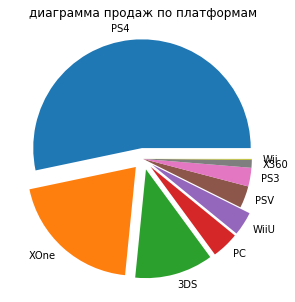

In [32]:
# диаграмма прродаж по платформам
explode = [0.1,0.1,0.1,0.1,0.1,0,0,0,0]
lead_sales.plot(y='sales', kind='pie', figsize=(5, 5), explode=explode, legend=False)
plt.title('диаграмма продаж по платформам');
plt.ylabel("");

<div style="border:solid blue 2px; padding: 20px">
    
    
Лидеры продаж платформы
    
    
- `PS4`
    
   
- `XOne` 
    
    
- `3DS` 
    
    
- `PC` 
    
    
- `WiiU` 
    
 
`PS4`  - наиболее потенциально прибыльная платформа `playstation` сменяет поколение `PS3` 
    
    

`XOne` - наиболее потенциально прибыльная платформа `microsoft` сменяет поколение `X360`
    
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
Методом `boxplot()` поcтроим диаграмму размаха
    
    
</div> 

Text(0.5, 1.0, 'диаграмма продаж по платформам')

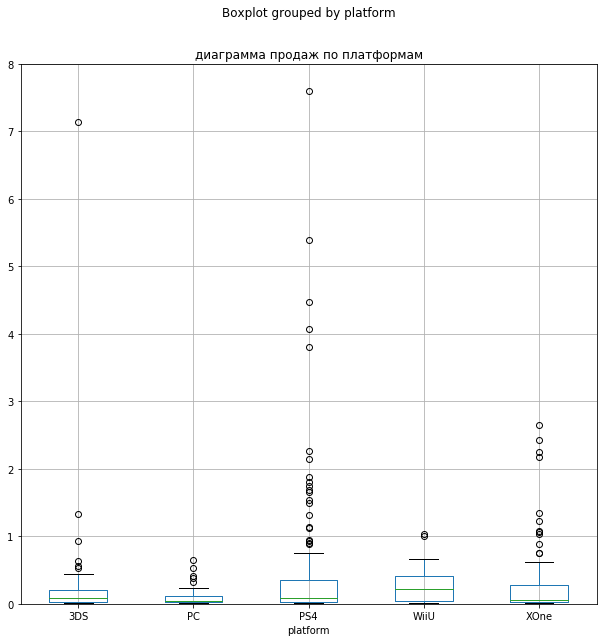

In [33]:
# диаграмма размаха
df_actual.query('platform == ("PS4","XOne","3DS","PC","WiiU")').boxplot(column=['sales'], by='platform', figsize=(10,10), grid=True).set_ylim(0,8)
plt.title('диаграмма продаж по платформам')

In [35]:
# описание данных продаж платформы 3DS
df_actual.query('platform == "3DS"')['sales'].describe()

count    46.000000
mean      0.329130
std       1.058533
min       0.010000
25%       0.030000
50%       0.080000
75%       0.210000
max       7.140000
Name: sales, dtype: float64

<div style="border:solid blue 2px; padding: 20px">
    
Продажи `3DS` в среднем по `0.08 млн. копий`, `75% - 0.21 млн. копий`, `max - 7.14 млн. копий`
    
    
Выбросы в небольшом объёме с малым количеством продаж
   
    
</div> 

In [36]:
# описание данных продаж платформы 3DS
df_actual.query('platform == "PC"')['sales'].describe()

count    54.000000
mean      0.097222
std       0.135916
min       0.010000
25%       0.020000
50%       0.035000
75%       0.120000
max       0.650000
Name: sales, dtype: float64

<div style="border:solid blue 2px; padding: 20px">
    
Продажи `PC` в среднем по `0.035 млн. копий`, `75% - 0.12 млн. копий`, `max - 0.65 млн. копий`
    
    
Выбросы с малым количеством продаж
    
</div> 

In [37]:
# описание данных продаж платформы 3DS
df_actual.query('platform == "PS4"')['sales'].describe()

count    164.000000
mean       0.422256
std        0.968877
min        0.010000
25%        0.030000
50%        0.085000
75%        0.352500
max        7.600000
Name: sales, dtype: float64

<div style="border:solid blue 2px; padding: 20px">
    
    
Продажи `PS4` в среднем по `0.085 млн. копий`, `75% - 0.35 млн. копий`, `max - 7.6 млн. копий`
    
    
Много выбросов с очень большим количеством продаж
   
   
    
</div> 

In [38]:
# описание данных продаж платформы 3DS
df_actual.query('platform == "WiiU"')['sales'].describe()

count    14.000000
mean      0.328571
std       0.348135
min       0.010000
25%       0.047500
50%       0.215000
75%       0.407500
max       1.030000
Name: sales, dtype: float64

<div style="border:solid blue 2px; padding: 20px">
    
    
Продажи `WiiU` в среднем по `0.215 млн. копий`, `75% - 0.4 млн. копий`, `max - 1.03 млн. копий`
    
    
Минимально выбросов
   
    
</div> 

In [39]:
# описание данных продаж платформы 3DS
df_actual.query('platform == "XOne"')['sales'].describe()

count    87.000000
mean      0.300575
std       0.549133
min       0.010000
25%       0.020000
50%       0.060000
75%       0.275000
max       2.650000
Name: sales, dtype: float64

<div style="border:solid blue 2px; padding: 20px">
    
    
Продажи `XOne` в среднем по `0.06 млн. копий`, `75% - 0.275 млн. копий`, `max - 2.65 млн. копий`
    
    
Выбросы в небольшом объёме с малым количеством продаж
   
   
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
    
Влияние отзывов на продажи для платформы `PS4`
   
    
</div> 

In [40]:
# срез данных по платформе PS4
df_actual_score = df_actual.query('platform == "PS4"').loc[:,['critic_score', 'user_score', 'sales']]
df_actual_score

,critic_score,user_score,sales
94,85.0,5.0,7.60
171,93.0,7.9,5.39
245,77.0,3.4,4.47
289,88.0,8.4,4.07
325,80.0,7.0,3.80
...,...,...,...
16500,69.0,7.5,0.01
16503,0.0,0.0,0.01
16526,61.0,7.9,0.01
16530,51.0,5.5,0.01


<div style="border:solid blue 2px; padding: 20px">
    
    
Метедом `corr()` получим матрицу корреляции
   
    
</div> 

In [41]:
# матрица корреляции
df_actual_score.corr()

,critic_score,user_score,sales
critic_score,1.000000,0.868078,0.292451
user_score,0.868078,1.000000,0.147090
sales,0.292451,0.147090,1.000000


<div style="border:solid blue 2px; padding: 20px">
    
    
Метедом `plotting.scatter_matrix` получим матрицу диаграмм рассеяния
   
    
</div> 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36aee2bf10>,
      dtype=object)

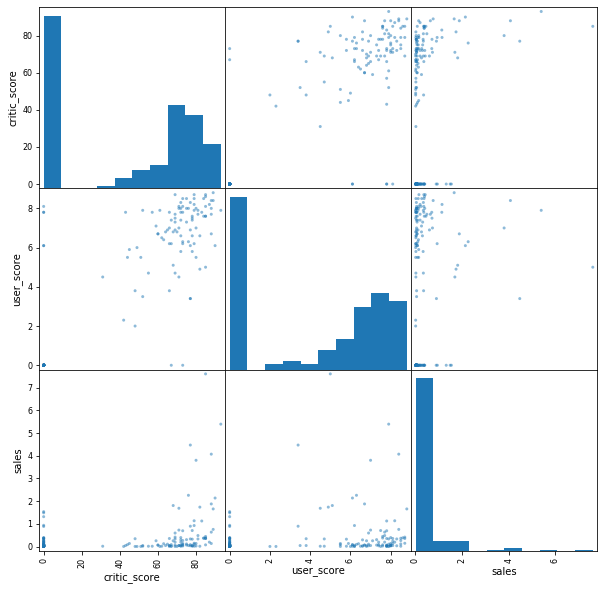

In [42]:
pd.plotting.scatter_matrix(df_actual_score, figsize=(10, 10))

<div style="border:solid blue 2px; padding: 20px">
    
    
- `critic_score` показывают слабую взаимосвязь с продажами
    
при высоких оценках критиков продажи растут
    
    
- `user_score` показывают слабую взаимосвязь с продажами 
    
    
- `critic_score` показывают взаимосвязь с `user_score`
    
    
при высоких оценках критиков пользователи также дают высокие оценки
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
    
Можно соотнести полученный вывод с продажами игр на других платформах
    
    
там так же будет взимосвязь между оценками критиков и пользователей с продажами
   
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
    
Методом `pivot_table()` получим сводную таблицу по `genre` c `sales` 
    

    
</div> 

In [43]:
# сводная таблица
genre_sales = df_actual.pivot_table(index='genre', values='sales', aggfunc='sum')
genre_sales = genre_sales.sort_values(by='sales', ascending=False)
genre_sales

,sales
genre,
Shooter,38.22
Action,30.11
Sports,23.49
Role-Playing,18.18
Fighting,4.47
Adventure,3.82
Platform,3.23
Racing,2.79
Misc,2.60


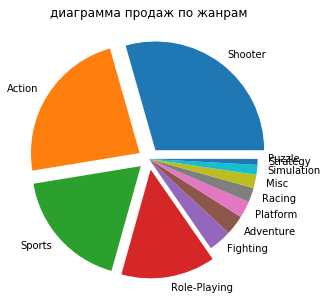

In [44]:
# диаграмма продаж по жанрам
explode = [0.1,0.1,0.1,0.1,0,0,0,0,0,0,0,0]
genre_sales.plot(y='sales', kind='pie', figsize=(5, 5), explode=explode, legend=False)
plt.title('диаграмма продаж по жанрам');
plt.ylabel("");

<div style="border:solid blue 2px; padding: 20px">
    
    
Выделяется несколько самых популярных жанров по продажам
    

- `Shooter` 
   
  
- `Action` 
   
  
- `Sports` 
   
  
- `Role-Playing` 
    
    
Эти жанры очень популярны во время соревнований и в дальнейшем должны получить большее развитие.
    
    

- `Puzzle` практически становятся не актуальными
    
    
- `Strategy` `Simulation` так же близки к уменьшению продаж
    
    
- `Misc` `Platform` `Racing` `Fighting` `Adventure` пользуются средним спросом
    
    
   
  
</div> 

### Вывод

<div style="border:solid blue 2px; padding: 20px">
    
    
Потенциально популярный продукт должен появится на платформе `PS4` в жанре `Action` или `Shooter`
   
    
</div> 

## Регионы NA/EU/JP

<div style="border:solid blue 2px; padding: 20px">
    
    
Популярные платформы. Различия в долях
   
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
    
Методом `pivot_table()` получим сводную таблицу по `platform` c `na_sales` 
    

    
</div> 

In [45]:
# сводная таблица
na_platform = df_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum')
na_platform['ratio'] = na_platform['na_sales'] / na_platform['na_sales'].sum()
na_platform = na_platform.sort_values(by='na_sales', ascending=False).head(5)
na_platform

,na_sales,ratio
platform,,
PS4,21.49,0.478300
XOne,14.27,0.317605
3DS,4.14,0.092143
WiiU,2.10,0.046739
PC,1.36,0.030269


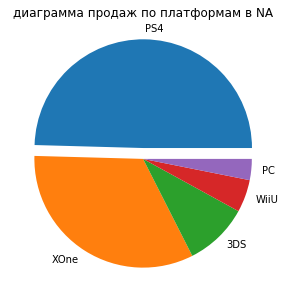

In [46]:
# диаграмма прродаж по платформам в NA
explode = [0.1,0,0,0,0]
na_platform.plot(y='na_sales', kind='pie', figsize=(5, 5), explode=explode, legend=False)
plt.title('диаграмма продаж по платформам в NA');
plt.ylabel("");

<div style="border:solid blue 2px; padding: 20px">
    
    
Методом `pivot_table()` получим сводную таблицу по `platform` c `eu_sales` 
    

    
</div> 

In [47]:
# сводная таблица
eu_platform = df_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
eu_platform['ratio'] = eu_platform['eu_sales'] / eu_platform['eu_sales'].sum()
eu_platform = eu_platform.sort_values(by='eu_sales', ascending=False).head()
eu_platform

,eu_sales,ratio
platform,,
PS4,31.78,0.620461
XOne,9.63,0.188012
PC,3.53,0.068918
3DS,2.33,0.045490
WiiU,1.48,0.028895


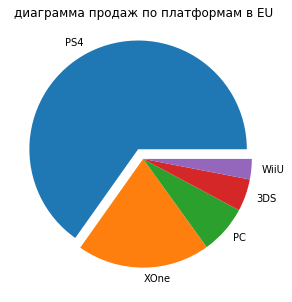

In [48]:
# диаграмма прродаж по платформам в EU
explode = [0.1,0,0,0,0]
eu_platform.plot(y='eu_sales', kind='pie', figsize=(5, 5), explode=explode, legend=False)
plt.title('диаграмма продаж по платформам в EU');
plt.ylabel("");

<div style="border:solid blue 2px; padding: 20px">
    
    
Методом `pivot_table()` получим сводную таблицу по `platform` c `jp_sales` 
    

    
</div> 

In [49]:
# сводная таблица
jp_platform = df_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
jp_platform['ratio'] = jp_platform['jp_sales'] / jp_platform['jp_sales'].sum()
jp_platform = jp_platform.sort_values(by='jp_sales', ascending=False).head()
jp_platform

,jp_sales,ratio
platform,,
3DS,8.03,0.415847
PS4,5.74,0.297255
PSV,3.56,0.184360
PS3,1.30,0.067323
WiiU,0.67,0.034697


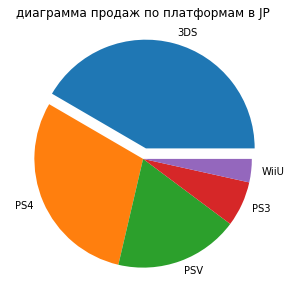

In [50]:
# диаграмма прродаж по платформам в JP
explode = [0.1,0,0,0,0]
jp_platform.plot(y='jp_sales', kind='pie', figsize=(5, 5), explode=explode, legend=False)
plt.title('диаграмма продаж по платформам в JP');
plt.ylabel("");

<div style="border:solid blue 2px; padding: 20px">
    
    
- `NA` топ-5 популярных платформ : высокая доля продаж `PS4` и `XOne`
    
    `PS4` доля продаж `47%`
    
    `XOne` доля продаж `31%`
    
    `3DS` доля продаж `9%`
    
    `WiiU` доля продаж `4%`
    
    `PC` доля продаж `3%`
   

- `EU` топ-5 популярных платформ : самая высокая доля продаж `PS4`
    
    `PS4` доля продаж `62%`
    
    `XOne` доля продаж `18%`
    
    `PC` доля продаж `6%`
    
    `3DS` доля продаж `4%`
    
    `WiiU` доля продаж `2%`
    
   
    
- `JP` топ-5 популярных платформ : самая высокая доля продаж `3DS`.
    
    `3DS` доля продаж `41%`
    
    `PS4` доля продаж `29%`
    
    `PSV` доля продаж `18%`
    
    `PS3` доля продаж `6%`
    
    `WiiU` доля продаж `4%`
    
    
    
 
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
    
Популярные жанры.
   
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
    
Методом `pivot_table()` получим сводную таблицу по `genre` c `na_sales` 
    

    
</div> 

In [51]:
# сводная таблица
na_genre = df_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum')
na_genre = na_genre.sort_values(by='na_sales', ascending=False).head()
na_genre

,na_sales
genre,
Shooter,16.24
Action,9.29
Sports,7.54
Role-Playing,5.89
Fighting,1.84


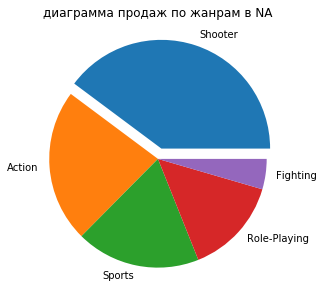

In [52]:
# диаграмма прродаж по жанрам в NA
explode = [0.1,0,0,0,0]
na_genre.plot(y='na_sales', kind='pie', figsize=(5, 5), explode=explode, legend=False)
plt.title('диаграмма продаж по жанрам в NA');
plt.ylabel("");

<div style="border:solid blue 2px; padding: 20px">
    
    
Методом `pivot_table()` получим сводную таблицу по `genre` c `eu_sales` 
    

    
</div> 

In [53]:
# сводная таблица
eu_genre = df_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
eu_genre = eu_genre.sort_values(by='eu_sales', ascending=False).head()
eu_genre

,eu_sales
genre,
Shooter,15.90
Sports,12.01
Action,10.68
Role-Playing,4.28
Racing,1.77


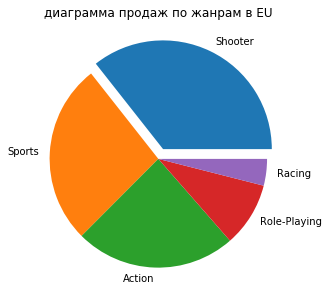

In [54]:
# диаграмма прродаж по жанрам в EU
explode = [0.1,0,0,0,0]
eu_genre.plot(y='eu_sales', kind='pie', figsize=(5, 5), explode=explode, legend=False)
plt.title('диаграмма продаж по жанрам в EU');
plt.ylabel("");

<div style="border:solid blue 2px; padding: 20px">
    
    
Методом `pivot_table()` получим сводную таблицу по `genre` c `jp_sales` 
    

    
</div> 

In [55]:
# сводная таблица
jp_genre = df_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
jp_genre = jp_genre.sort_values(by='jp_sales', ascending=False).head()
jp_genre

,jp_sales
genre,
Action,7.07
Role-Playing,6.61
Adventure,1.18
Shooter,1.06
Misc,1.04


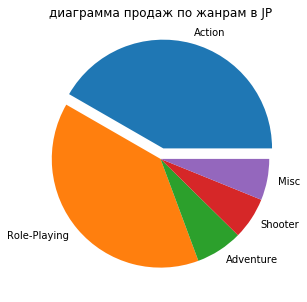

In [56]:
# диаграмма прродаж по жанрам в JP
explode = [0.1,0,0,0,0]
jp_genre.plot(y='jp_sales', kind='pie', figsize=(5, 5), explode=explode, legend=False)
plt.title('диаграмма продаж по жанрам в JP');
plt.ylabel("");

<div style="border:solid blue 2px; padding: 20px">
    
    
- `NA` топ-5 популярных жанров: `Shooter` `Action` `Sports` `Role-Playing` `Fighting`
   

- `EU` топ-5 популярных жанров: `Shooter` `Sports` `Action` `Role-Playing` `Racing`
        
    
- `JP` топ-5 популярных жанров: `Action` `Role-Playing` `Adventure` `Shooter` `Misc` 
    
     
 Жанры топ-5 очень схожи в  `NA` и `EU`, и отличаются от `JP`
 
    
  
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
    
Влияние рейтинга на регионы.
   
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
    
Методом `pivot_table()` получим сводную таблицу по `rating` c `na_sales` 
    

    
</div> 

In [57]:
# сводная таблица
na_rating = df_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum')
na_rating = na_rating.sort_values(by='na_sales', ascending=False)
na_rating

,na_sales
rating,
M,15.67
T,8.95
unknown,8.53
E,7.97
E10+,3.81


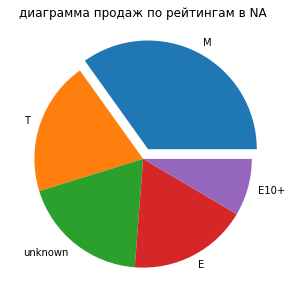

In [58]:
# диаграмма прродаж по рейтингам в NA
explode = [0.1,0,0,0,0]
na_rating.plot(y='na_sales', kind='pie', figsize=(5, 5), explode=explode, legend=False)
plt.title('диаграмма продаж по рейтингам в NA');
plt.ylabel("");

<div style="border:solid blue 2px; padding: 20px">
    
    
Методом `pivot_table()` получим сводную таблицу по `rating` c `eu_sales` 
    

    
</div> 

In [59]:
# сводная таблица
eu_rating = df_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
eu_rating = eu_rating.sort_values(by='eu_sales', ascending=False)
eu_rating

,eu_sales
rating,
M,16.54
E,13.61
T,9.79
unknown,7.47
E10+,3.81


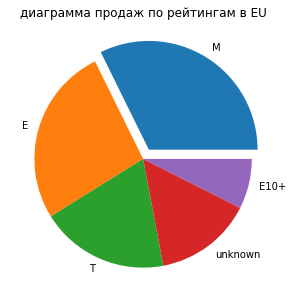

In [60]:
# диаграмма прродаж по рейтингам в EU
explode = [0.1,0,0,0,0]
eu_rating.plot(y='eu_sales', kind='pie', figsize=(5, 5), explode=explode, legend=False)
plt.title('диаграмма продаж по рейтингам в EU');
plt.ylabel("");

<div style="border:solid blue 2px; padding: 20px">
    
    
Методом `pivot_table()` получим сводную таблицу по `rating` c `jp_sales` 
    

    
</div> 

In [61]:
# сводная таблица
jp_rating = df_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
jp_rating = jp_rating.sort_values(by='jp_sales', ascending=False)
jp_rating

,jp_sales
rating,
unknown,14.32
T,2.27
M,1.20
E,1.07
E10+,0.45


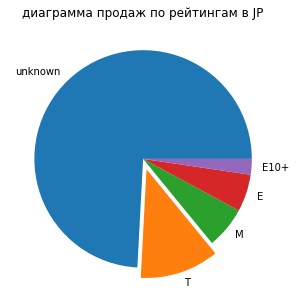

In [62]:
# диаграмма прродаж по рейтингам в JP
explode = [0,0.1,0,0,0]
jp_rating.plot(y='jp_sales', kind='pie', figsize=(5, 5), explode=explode, legend=False)
plt.title('диаграмма продаж по рейтингам в JP');
plt.ylabel("");

#### Вывод

<div style="border:solid blue 2px; padding: 20px">
    
    
- `NA` и `EU` влияет рейтинг на продажи
    
    `M` - mature 17+
    
    `E` - everyone 6+
    
    `T` - teen 13+
   
    
    
- `JP` другие рейтинги влияют на продажи
    
    `T` - teen 13+
   
    
    
 Игры рейтингом `M (mature 17+)` больше спросом в `NA` и `EU`, а в `JP` `T (teen 13+)` больше
 
    
  
</div> 

## Гипотезы

In [63]:
# описание данных
xone = df_actual.query('platform == "XOne"')
xone_describe = xone['user_score'].describe()
xone_describe

count    87.000000
mean      5.005747
std       3.138929
min       0.000000
25%       2.350000
50%       6.200000
75%       7.450000
max       8.800000
Name: user_score, dtype: float64

In [64]:
# описание данных
pc = df_actual.query('platform == "PC"')
pc_describe = pc['user_score'].describe()
pc_describe

count    54.000000
mean      5.248148
std       2.850603
min       0.000000
25%       3.550000
50%       6.250000
75%       7.300000
max       8.700000
Name: user_score, dtype: float64

<div style="border:solid blue 2px; padding: 20px">
    
Методом `scipy.stats.ttest_ind` проверим гипотезу о различии среднего двух выборок
    
**Нулевая гипотеза `h0`** средние пользовательские рейтинги `XOne` и `PC` **`равны`**
    
    
**Альтернативная гипотеза `h1`** средние пользовательские рейтинги `XOne` и `PC` **`различаются`**
    
    
</div>

<div style="border:solid blue 2px; padding: 20px">
    
    
Пороговое значение зададим `alpha` `=`  `0.05`
    

    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Для фильтрации выбросов используем межквартильный метод

    
</div> 

In [65]:
# исключение выбросов
def outliers(df, column, graphic=0, x = 10, y = 10):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (df[column] >= (q1 - 1.5 * iqr)) & (df[column] <= (q3 + 1.5 * iqr))
    if graphic == 1:
        return df.loc[iqr_test].boxplot([column], figsize=(x,y))
    else:
        return df.loc[iqr_test]
xone = outliers(xone, 'user_score', 0)
pc = outliers(pc, 'user_score', 0)

In [66]:
# получение массивов для теста
xone_array = xone['user_score']
pc_array = pc['user_score']

In [67]:
# проверка гипотезы
alpha = 0.05
results = st.ttest_ind(xone_array, pc_array)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6452008993598133
Не получилось отвергнуть нулевую гипотезу


<div style="border:solid blue 2px; padding: 20px">
    
    
Получили ответ
    
    
- **Нулевую гипотезу `h0`** не получилось отвергнуть
    

- `p-значение` `64%` это большая вероятность чтобы делать вывод о значимом различии
   
    
</div>


In [68]:
# описание данных
action = df_actual.query('genre == "Action"')
action_describe = action['user_score'].describe()
action_describe

count    178.000000
mean       3.170225
std        3.476647
min        0.000000
25%        0.000000
50%        0.000000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

In [69]:
# описание данных
sports = df_actual.query('genre == "Sports"')
sports_describe = sports['user_score'].describe()
sports_describe

count    48.000000
mean      4.187500
std       2.917783
min       0.000000
25%       0.575000
50%       4.950000
75%       6.525000
max       8.700000
Name: user_score, dtype: float64

<div style="border:solid blue 2px; padding: 20px">
    
**Гипотеза о различии средних двух выборок независимых между собой**
    
средние пользовательские рейтинги жанров `Action` и `Sports` разные
    
    
**Проведём статистический тест**
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Методом `scipy.stats.ttest_ind` проверим гипотезу о различии среднего двух выборок
    
**Нулевая гипотеза `h0`** средние пользовательские рейтинги жанров `Action` и `Sports` **`равны`**
    
    
**Альтернативная гипотеза `h1`** средние пользовательские рейтинги жанров `Action`и`Sports` **`различаются`**
    
    
</div> 

In [70]:
# исключение выбросов
action = outliers(action, 'user_score', 0)
sports = outliers(sports, 'user_score', 0)

In [71]:
# получение массивов для теста
action_array = action['user_score']
sports_array = sports['user_score']

In [72]:
# проверка гипотезы
alpha = 0.05
results = st.ttest_ind(action_array, sports_array)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.06453284495697292
Не получилось отвергнуть нулевую гипотезу


<div style="border:solid blue 2px; padding: 20px">
    
    
Получили ответ
    
    
- **Нулевую гипотезу `h0`** не получилось отвергнуть
    

- `p-значение` `6%` вероятность чтобы делать вывод о значимом различии
   
    
</div> 

## Вывод

<div style="border:solid blue 2px; padding: 20px">
    
    
**Платформа** - это один из основных параметров
    
Перспективные для продаж в `NA` и `EU` продукты нужны на  `PS4` и `XOne`,
    
а в `JP` c `40%` рекомендовать игры на платформе `3DS`
    
**Жанр** - сильно скажется на продажах игр: `Shooter`-будет популярен во всех регионах на `2017`год
    
**Рейтинг** ассоциации ESRB: стоит уделить внимание так же рейтингу `E` для всех регионов
    
Для `NA` и `EU` предпочтительно `M`,
    
а в `JP`  предпочтительно `T`
    
    
**Оценка критиков** - может оказать влияние на продажу игр
    
    
Зная, какие игры предположительно будут пользоваться спросом, следует также знать, 
    
    
как рекламировать и продвигать их. 
    
    
Нельзя просто положиться на качество игр, которое должно волшебным образом привлечь пользователя.
    

Каждый день в продажу выходит большое количество игр на разных платформах [лидеры продаж](#leader), 
    
они различаются по качеству, но конкуренция очень высокая и трудно сделать так, чтобы игру заметили
    
    
И чтобы добится поставленной цели выявить определяющие успешность игры закономерности
    
необходимо учитывать ещё две метрики: количество новых покупателей и их платёжеспособность
    
    
Поэтому здесь важно правильно сделать ставку на как на предполагаемый популярный продукт, 
    
 так и на предполагаемых покупателей этого продукта.
    
    
Спланировать рекламную кампанию необходимо в несколько этапов и на разные категории возрастов
    
    
Первые результаты проанализировать и уже по ним выбирать каналы продвижения в разных регионах
    
    
и правильно настроить таргетированную рекламу.

</div> 